In [5]:
import pandas as pd
import numpy as np

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
sns.set(rc={'figure.figsize': (9,6)})

In [8]:
events_data = pd.read_csv('event_data_train.csv')

In [9]:
submissions_data = pd.read_csv('submissions_data_train.csv')

In [10]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [11]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [12]:
# создаем колонку с датой
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')

In [13]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [14]:
events_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [15]:
events_data.date.min()

Timestamp('2015-06-15 04:00:48')

In [16]:
# создаем колонку с днем
events_data['day'] = events_data.date.dt.date
submissions_data['day'] = submissions_data.date.dt.date

In [17]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [18]:
events_data.query('action == "started_attempt"')

,step_id,timestamp,action,user_id,date,day
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19,2015-06-15
15,32812,1434341016,started_attempt,17632,2015-06-15 04:03:36,2015-06-15
73,32929,1434342100,started_attempt,442,2015-06-15 04:21:40,2015-06-15
80,32812,1434342114,started_attempt,442,2015-06-15 04:21:54,2015-06-15
81,32812,1434342148,started_attempt,442,2015-06-15 04:22:28,2015-06-15
...,...,...,...,...,...,...
3480640,32810,1526769245,started_attempt,11677,2018-05-19 22:34:05,2018-05-19
3480646,31988,1526769722,started_attempt,19410,2018-05-19 22:42:02,2018-05-19
3480655,31986,1526769997,started_attempt,19410,2018-05-19 22:46:37,2018-05-19
3480662,32089,1526770169,started_attempt,19410,2018-05-19 22:49:29,2018-05-19


In [19]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


<AxesSubplot:xlabel='day'>

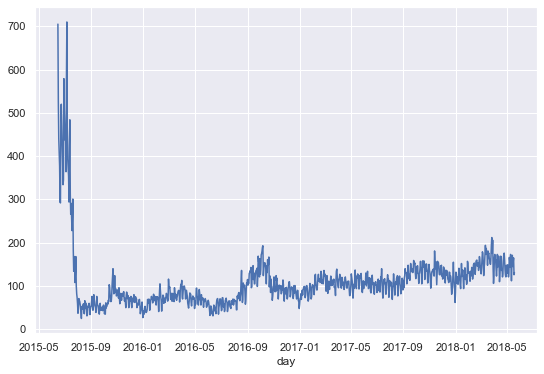

In [20]:
# Активность студентов по дням
events_data.groupby('day')\
    .user_id.nunique().plot()

In [21]:
# ищем сколько заданий выполнил каждый студент
# этот вариант не правильный
# потому что теряется часть студентов, которые не решили ни одного задания
passed_stud = events_data.query('action == "passed"') \
    .groupby('user_id', as_index = False)\
    .agg({'step_id': 'count'}) \
    .rename(columns={'step_id': 'passed_steps'})

<AxesSubplot:>

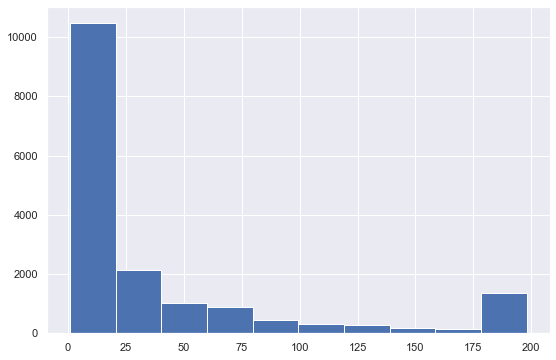

In [22]:
passed_stud.passed_steps.hist()

In [23]:
passed_stud.user_id.nunique()

17262

In [24]:
events_data.user_id.nunique()

19234

In [25]:
# правильный вариант с учетом всех студентов
users_events_data = events_data.pivot_table(index='user_id',
                        columns='action',
                        values= 'step_id',
                        aggfunc= 'count',
                        fill_value=0).reset_index()

<AxesSubplot:>

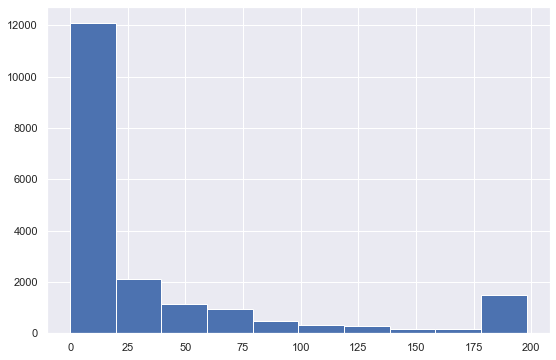

In [26]:
users_events_data.discovered.hist()

In [27]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [28]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [29]:
# находим колличество правильных ответов студентов
users_scores = submissions_data.pivot_table(index='user_id', 
                             columns='submission_status', 
                             values='step_id', 
                             aggfunc='count',
                             fill_value=0).reset_index()

In [67]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


<AxesSubplot:>

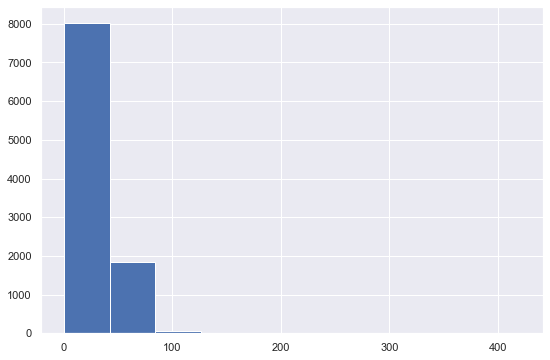

In [30]:
users_scores.correct.hist()

In [31]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [32]:
# 
gap_data =events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
    .groupby('user_id')['timestamp'].apply(list).apply(np.diff).values
gap_data

array([array([], dtype=int64), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
          98252,    57019]),
       array([1567990]), array([], dtype=int64)], dtype=object)

In [33]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))
gap_data.head()

0    4843602
1    6899249
2     182484
3      93710
4    2768870
dtype: int64

In [34]:
gap_data = gap_data / (24*60*60)
gap_data.head()

0    56.060208
1    79.852419
2     2.112083
3     1.084606
4    32.047106
dtype: float64

<AxesSubplot:>

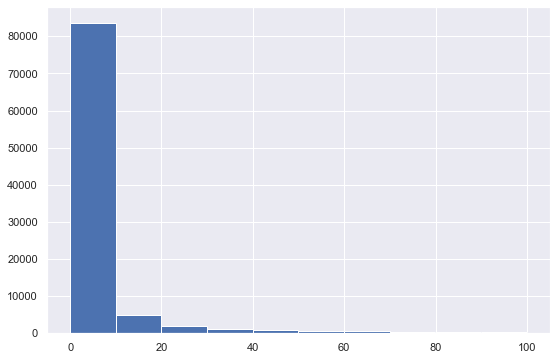

In [35]:
gap_data[gap_data < 100].hist()

In [51]:
gap_data.quantile(0.93)

34.77025787037036

In [37]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [38]:
# Анатолия Карпалогия
users_scores.query('correct == correct.max()')

submission_status,user_id,correct,wrong
439,1046,421,513


In [41]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [39]:
# время на текущий момент
now = events_data.timestamp.max()

In [46]:
# если студент не заходит больше этого времени, то с вероятностью 90 процентов он отвалился
max_timestamp = 30*24*60*60

In [45]:
users_data = events_data.groupby('user_id', as_index=False).agg({'timestamp':'max'})

In [57]:
users_data['is_gone'] = (now - users_data.timestamp) > max_timestamp

In [56]:
users_data.rename(columns={"timestamp": "absence_time" }).head(5)

,user_id,absence_time,is_gone
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [58]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [61]:
# используя функию merge обЪеденили 2 датафрейма по общей колонке user_id
users_data= users_data.merge(users_scores, on='user_id', how='outer')

In [65]:
# заполнили все Nan значения нулями
users_data = users_data.fillna(0)

In [81]:
# создаем датафрем с числом уникальных дней на курсе
users_day = events_data.groupby('user_id').day.nunique().to_frame().reset_index()
users_day = users_day.rename(columns={'day':'unique_days'})

In [68]:
users_data = users_data.merge(users_events_data, on='user_id', how='outer')

In [85]:
users_data = users_data.merge(users_day, on='user_id', how='outer')

In [92]:
users_data['passed_course'] = users_data.passed > 170

In [112]:
users_data.rename(columns={'timestamp':'last_timestamp'}).head()

,user_id,last_timestamp,is_gone,correct,wrong,discovered,passed,started_attempt,viewed,unique_days,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [94]:
# проверяем не потеряли ли кого нибудь
users_data.user_id.nunique() == events_data.user_id.nunique()

True

In [108]:
users_data.groupby('passed_course').agg({"user_id": 'count'})


,user_id
passed_course,
False,17809
True,1425


In [111]:
# проверка на адекватность наших результатов
# процент прошедших курс 8% 

100* 1425/17809

8.001572238755685